# Second Assignment
* Each exercise is distinquished from the other using a h2 header.
* All files used in this assignment should be located in the same path of this file (p3170076_assignment2.ipynb), except the one used to create `country_scores` DataFrame which is read via URL.

> Themelina Kouzoumpasi  
> p3170076

* All libraries used in the assignment are imported below.

In [1]:
# libraries
import pandas as pd
from plotnine import  *
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats

# If max_cols is exceeded, switch to truncate view
pd.set_option('display.max_columns', None)

* DataFrame `country_codes` contains part of the results of the study, grouped by country. Specifically, data consists of the portion of people above the "Low International Benchmark" of 400 on the TIMSS Math and PIRLS Reading scales, as well as the median scores on the TIMSS math scale and PIRLS reading scale.

In [2]:
country_scores = pd.read_excel('https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx',
                               sheet_name='Country Scores',
                               index_col=False)

display(country_scores.columns)
country_scores

Index(['Country', 'Country Code',
       'Percent Above Math Benchmark (400 on TIMSS Scale)',
       'Percent Above Reading Benchmark (400 on PIRLS Scale)',
       'Median Math Score (TIMSS Scale, 4th Grade)',
       'Median Reading Score (PIRLS Scale, 4th Grade)'],
      dtype='object')

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


* To make things easier, `country_scores`'s columns are renamed.

In [3]:
country_scores.rename(columns={
                      'Percent Above Math Benchmark (400 on TIMSS Scale)': 'PercMathTIMSS', 
                      'Percent Above Reading Benchmark (400 on PIRLS Scale)': 'PercReadPIRLS',
                      'Median Math Score (TIMSS Scale, 4th Grade)': 'MedMathScoreTIMSS',
                      'Median Reading Score (PIRLS Scale, 4th Grade)': 'MedReadScorePIRLS'
                     }, inplace=True)
country_scores

,Country,Country Code,PercMathTIMSS,PercReadPIRLS,MedMathScoreTIMSS,MedReadScorePIRLS
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


## Exercise 1

* DataFrame `wdi_data` contains income data per country as given by the World Bank.
* To avoid csv's footer, `nrows` parameter is used.

In [4]:
wdi_data = pd.read_csv('WDI_data.csv',
                       sep=',',
                       index_col=False,
                       nrows=792)

display(wdi_data.columns)
wdi_data

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2015 [YR2015]'],
      dtype='object')

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,..
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..


* To make things easier, `2015 [YR2015]` is renamed.

In [5]:
wdi_data.rename(columns={'2015 [YR2015]':"YR2015"},inplace=True)

wdi_data

,Country Name,Country Code,Series Name,Series Code,YR2015
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,..
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..


* The study for this exercise focuses on the relationship between logged income and TIMSS, and logged income and PIRLS. Therefore, `country_scores` and `wdi_data` should be combined together.
* `wdi_data` DataFrame contains some entries regarding school enrollments, but for this study we are only interested for the GDP per capita, as the original paper of the study suggests.

In [6]:
scores_income = pd.merge(country_scores[['Country','Country Code','MedMathScoreTIMSS',
                                         'MedReadScorePIRLS']],
                         wdi_data[['Country Code','Series Name','YR2015']],
                         on='Country Code',
                         how='inner')

# isolation of the useful entries
scores_income = scores_income.loc[scores_income['Series Name']=='GDP per capita, PPP (constant 2011 international $)']\
                             

scores_income

,Country,Country Code,MedMathScoreTIMSS,MedReadScorePIRLS,Series Name,YR2015
0,U.A.E.,ARE,437.000000,440.000000,"GDP per capita, PPP (constant 2011 internation...",65975.3755468552
3,Argentina,ARG,406.652557,431.443542,"GDP per capita, PPP (constant 2011 internation...",19101.2973920688
6,Armenia,ARM,454.000000,NaN,"GDP per capita, PPP (constant 2011 internation...",8195.93364956571
9,Australia,AUS,520.000000,534.000000,"GDP per capita, PPP (constant 2011 internation...",43719.5021648696
12,Austria,AUT,511.000000,533.000000,"GDP per capita, PPP (constant 2011 internation...",44353.8752139122
...,...,...,...,...,...,...
219,Turkey,TUR,477.000000,NaN,"GDP per capita, PPP (constant 2011 internation...",23388.4813019367
222,Uruguay,URY,424.912933,450.448608,"GDP per capita, PPP (constant 2011 internation...",19831.4458942372
225,United States,USA,544.000000,560.000000,"GDP per capita, PPP (constant 2011 internation...",53029.2933612438
228,Yemen,YEM,243.000000,NaN,"GDP per capita, PPP (constant 2011 internation...",2641.04582911357


* All columns of `scores_income` DataFrame are defined as strings by default.

In [7]:
scores_income = scores_income.astype({'YR2015':np.float64,
                                      'MedMathScoreTIMSS':np.float64,
                                      'MedReadScorePIRLS':np.float64})

* As the original file suggests, x-axis of the diagrams (column `YR2015`) should be logged.

In [8]:
scores_income['YR2015'] = np.log(scores_income['YR2015'])

* The regression analysis regarding TIMSS and logged income is done below.
* The `params` attribute is shown to get all the needed information to produce the relationship (regression line) between `TIMSS` and `YR2015`.

In [9]:
# remove possible null values
timss = scores_income[~scores_income['MedMathScoreTIMSS'].isnull()]

# run the regression
regr_timss = smf.ols('MedMathScoreTIMSS ~ YR2015',data=timss).fit()

# show params attribute
regr_timss.params

Intercept    46.117041
YR2015       41.745974
dtype: float64

* Based on the `params` values, the **relationship** between `TIMSS`($y$) and `YR2015`($x$) is:  
$$ y = 46.117041 + 41.745974x $$
* The **summary table of the model regarding TIMSS** is shown below.

In [10]:
regr_timss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      MedMathScoreTIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        16:15:36   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
YR2015        41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The regression analysis regarding PIRLS and logged income is done below.
* The `params` attribute is shown to get all the needed information to produce the relationship between `PIRLS` and `YR2015`.

In [11]:
# remove possible null values
pirls = scores_income[~scores_income['MedReadScorePIRLS'].isnull()]

# run the regression
regr_pirls = smf.ols('MedReadScorePIRLS ~ YR2015',data=pirls).fit()

# show params attribute
regr_pirls.params

Intercept    42.619127
YR2015       43.912415
dtype: float64

* Based on the `params` values, the **relationship** between `PIRLS`($y$) and `YR2015`($x$) is:  
$$ y = 42.619127 + 43.912415x $$
* The **summary table of the model regarding PIRLS** is shown below.

In [12]:
regr_pirls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      MedReadScorePIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        16:15:36   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
YR2015        43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The **relationship between logged income and TIMSS** is plotted below.

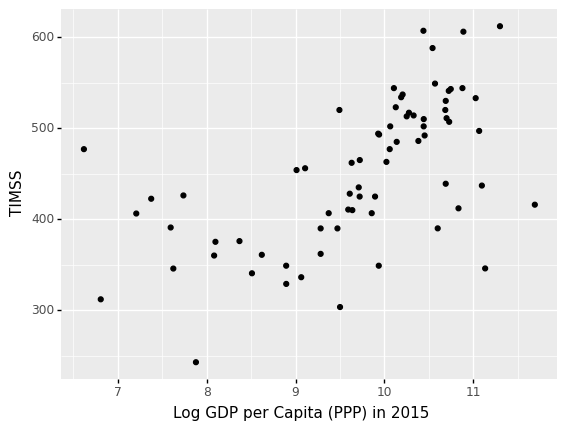

<ggplot: (-9223371889453120424)>

In [13]:
ggplot(data=scores_income) + \
    geom_point(mapping=aes(x='YR2015', y='MedMathScoreTIMSS'), na_rm=True) + \
    xlab("Log GDP per Capita (PPP) in 2015") + \
    ylab("TIMSS")

* The **relationship between logged income and PIRLS** is plotted below.

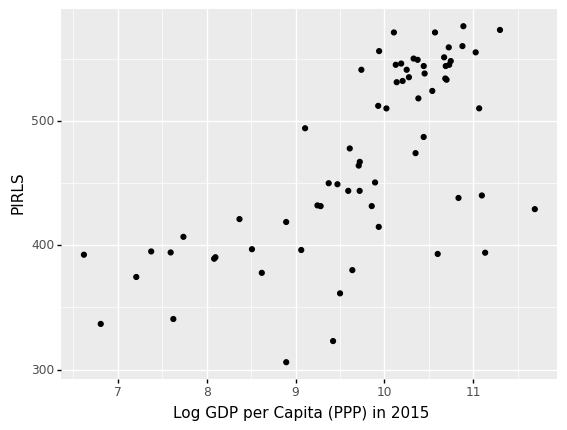

<ggplot: (-9223371889444627556)>

In [14]:
ggplot(data=scores_income) + \
    geom_point(mapping=aes(x='YR2015', y='MedReadScorePIRLS'), na_rm=True) + \
    xlab("Log GDP per Capita (PPP) in 2015") + \
    ylab("PIRLS")

* The plot of the model regarding both TIMSS and PIRLS, added the regression lines, is shown below. 
* Values and line regarding TIMSS is in red color, while values and line regarding PIRLS is in black.

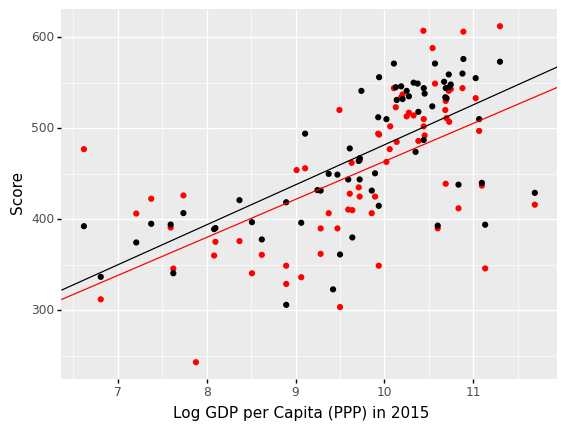

<ggplot: (-9223371889444544560)>

In [15]:
(ggplot(scores_income, aes(x='YR2015')))  + \
      geom_point(mapping=aes(x='YR2015', y='MedMathScoreTIMSS'), na_rm=True, color='red') + \
      geom_point(mapping=aes(x='YR2015', y='MedReadScorePIRLS'), na_rm=True) + \
      geom_abline(intercept=regr_timss.params['Intercept'], 
                  slope=regr_timss.params['YR2015'], color='red') + \
      geom_abline(intercept=regr_pirls.params['Intercept'], 
                  slope=regr_pirls.params['YR2015']) + \
      xlab("Log GDP per Capita (PPP) in 2015") + \
      ylab('Score')

* The models shown above prove that while the GDP per country increases, the TIMSS and PIRLS scores are rising too. This theory is proved by the majority of the countries, however there are some countries that do not follow this theory, as while their GDP is increased, scores are low and via versa.

## Exercise 2

* The residuals of the models created in Exercise 1 are stored in DataFrames `res_timss` and `res_pirls` for TIMSS and PIRLS accordingly, matching with the original data used by the regressions of Exercise 1

In [16]:
# get data used in Ex1 regressions
res_timss = timss.copy()
res_pirls = pirls.copy()

# append residuals
res_timss['Residuals'] = regr_timss.resid.to_frame()
res_pirls['Residuals'] = regr_pirls.resid.to_frame()

display(res_timss.shape)
display(res_pirls.shape)
display(res_timss.head(2))
display(res_pirls.head(2))

(71, 7)

(68, 7)

,Country,Country Code,MedMathScoreTIMSS,MedReadScorePIRLS,Series Name,YR2015,Residuals
0,U.A.E.,ARE,437.000000,440.000000,"GDP per capita, PPP (constant 2011 internation...",11.097037,-72.373659
3,Argentina,ARG,406.652557,431.443542,"GDP per capita, PPP (constant 2011 internation...",9.857512,-50.975909


,Country,Country Code,MedMathScoreTIMSS,MedReadScorePIRLS,Series Name,YR2015,Residuals
0,U.A.E.,ARE,437.000000,440.000000,"GDP per capita, PPP (constant 2011 internation...",11.097037,-89.916813
3,Argentina,ARG,406.652557,431.443542,"GDP per capita, PPP (constant 2011 internation...",9.857512,-44.042720


* `avg_schYears` DataFrame contains average years of schooling data, along with some more information

In [17]:
avg_schYears = pd.read_stata('BL2013_MF1599_v2.2.dta')
avg_schYears

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950.0,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955.0,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960.0,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965.0,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970.0,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,358.0,Ukraine,1990.0,MF,15.0,999.0,5.785368,14.138213,11.648808,59.848248,41.504124,20.228174,12.362464,9.531308,4.706372,4.173123,0.651813,40770.0,UKR,Europe and Central Asia
1894,358.0,Ukraine,1995.0,MF,15.0,999.0,4.284995,10.039333,8.426095,58.694180,40.753365,26.981485,16.553701,10.154778,4.886407,4.397667,0.870704,40989.0,UKR,Europe and Central Asia
1895,358.0,Ukraine,2000.0,MF,15.0,999.0,2.861569,9.811013,7.551663,53.745895,36.992371,33.192432,20.433352,10.453713,4.977168,4.404029,1.072516,40332.0,UKR,Europe and Central Asia
1896,358.0,Ukraine,2005.0,MF,15.0,999.0,1.898582,6.847359,5.919780,54.743999,39.278564,36.510059,22.327957,10.967577,5.042674,4.748143,1.176760,39573.0,UKR,Europe and Central Asia


* We are interested only for values reported for 2010.

In [18]:
avg_schYears = avg_schYears[avg_schYears['year']==2010]
avg_schYears.shape

(146, 20)

* To make the regression analysis regarding average years of schooling and logged income, an inner join of `avg_schYears` and `res_timss` has to be made, so as to join these information together. Same goes for PIRLS.
* `avgY_timss` contains all information of `res_timss` connected to the years of schooling per country.
* `avgY_pirls` contains all information of `pirls_timss` connected to the years of schooling per country.

In [19]:
# about TIMSS
avgY_timss = pd.merge(avg_schYears[['yr_sch','WBcode']],
                      res_timss,
                      right_on='Country Code',
                      left_on='WBcode',
                      how='inner')

# about PIRLS
avgY_pirls = pd.merge(avg_schYears[['yr_sch','WBcode']],
                      res_pirls,
                      right_on='Country Code',
                      left_on='WBcode',
                      how='inner')

display(avgY_timss.shape)
avgY_pirls.shape

(65, 9)

(63, 9)

* Columns `YR2015` and `yr_sch` are converted to float.

In [20]:
avgY_timss = avgY_timss.astype({'YR2015':np.float64,
                                'yr_sch':np.float64})

avgY_pirls = avgY_pirls.astype({'YR2015':np.float64,
                                'yr_sch':np.float64})

* The regression analysis regarding average years of schooling and logged income connected to `TIMSS` residuals is done below.
* Before running the regression, any possible null values are removed. Column `YR2015` doesn't have any, as in Exercise 1 they were removed.
* After the regression runs, the **summary table** is printed, showing the results of the model.

In [21]:
# remove any possible null values of 'yr_sch'
avgY_timss = avgY_timss[~avgY_timss['yr_sch'].isnull()]

# run the regression
regr_avgY_timss = smf.ols('yr_sch ~ YR2015',data=avgY_timss).fit()

# show results
display(regr_avgY_timss.resid.to_frame().shape)
regr_avgY_timss.summary()

(65, 1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     101.1
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           1.01e-14
Time:                        16:15:41   Log-Likelihood:                -126.12
No. Observations:                  65   AIC:                             256.2
Df Residuals:                      63   BIC:                             260.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.9217      1.885     -5.262      0.000     -13.689      -6.154
YR2015         1.9261      0.192     10.055      0.000       1.543       2.309
==============================================================================
Omnibus:                        5.970   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.076
Skew:                          -0.629   Prob(JB):                       0.0790
Kurtosis:                       3.539   Cond. No.                         88.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The regression analysis regarding average years of schooling and logged income connected to `PIRLS` residuals is done below.
* Before running the regression, any possible null values are removed. Column `YR2015` doesn't have any, as in Exercise 1 they were removed.
* After the regression runs, the **summary table** is printed, showing the results of the model.

In [22]:
# remove any possible null values of 'yr_sch'
avgY_pirls = avgY_pirls[~avgY_pirls['yr_sch'].isnull()]

# run the regression
regr_avgY_pirls = smf.ols('yr_sch ~ YR2015',data=avgY_pirls).fit()

# show results
display(regr_avgY_pirls.resid.to_frame().shape)
regr_avgY_pirls.summary()

(63, 1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     112.9
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           1.68e-15
Time:                        16:15:41   Log-Likelihood:                -118.40
No. Observations:                  63   AIC:                             240.8
Df Residuals:                      61   BIC:                             245.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1825      1.829     -5.567      0.000     -13.840      -6.525
YR2015         1.9671      0.185     10.624      0.000       1.597       2.337
==============================================================================
Omnibus:                       12.128   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.059
Skew:                          -0.895   Prob(JB):                      0.00146
Kurtosis:                       4.331   Cond. No.                         89.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The residuals of the two above regressions are appended in DataFrames `avgY_timss` and `avgY_pirls`, in order to connect them to residuals of Exercise 1 to run the requested regressions.

In [23]:
avgY_timss['Residuals_Years'] = regr_avgY_timss.resid.to_frame()
avgY_pirls['Residuals_Years'] = regr_avgY_pirls.resid.to_frame()

* The **regression between the TIMSS residuals and the schooling residuals** is run below.
* The **model's results** are printed.

In [24]:
# run regression
regr = smf.ols('Residuals_Years ~ Residuals',data=avgY_timss).fit()

# show model's results
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Residuals_Years   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     29.50
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           9.57e-07
Time:                        16:15:42   Log-Likelihood:                -113.63
No. Observations:                  65   AIC:                             231.3
Df Residuals:                      63   BIC:                             235.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0162      0.175      0.093      0.927      -0.334       0.366
Residuals      0.0147      0.003      5.432      0.000       0.009       0.020
==============================================================================
Omnibus:                        3.025   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.956
Skew:                          -0.494   Prob(JB):                        0.228
Kurtosis:                       2.663   Cond. No.                         64.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The **figure regarding regression between TIMSS and schooling residuals** is shown below.

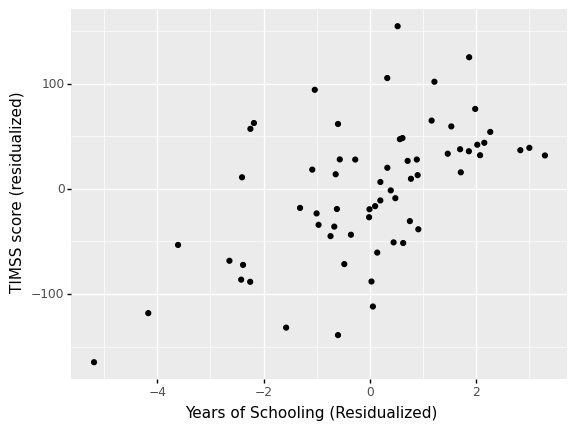

<ggplot: (-9223371889444416704)>

In [25]:
ggplot(data=avgY_timss) + \
    geom_point(mapping=aes(x='Residuals_Years', y='Residuals'), na_rm=True) + \
    xlab("Years of Schooling (Residualized)") + \
    ylab("TIMSS score (residualized)")

* The **regression between the PIRLS residuals and the schooling residuals** is run below.
* The **model's results** are printed.

In [26]:
# run regression
regr = smf.ols('Residuals_Years ~ Residuals',data=avgY_pirls).fit()

# show model's results
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Residuals_Years   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     33.93
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           2.29e-07
Time:                        16:15:43   Log-Likelihood:                -104.47
No. Observations:                  63   AIC:                             212.9
Df Residuals:                      61   BIC:                             217.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0209      0.163     -0.128      0.898      -0.346       0.304
Residuals      0.0177      0.003      5.825      0.000       0.012       0.024
==============================================================================
Omnibus:                        3.069   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.273
Skew:                          -0.293   Prob(JB):                        0.321
Kurtosis:                       3.723   Cond. No.                         53.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The **figure regarding regression between PIRLS and schooling residuals** is shown below.

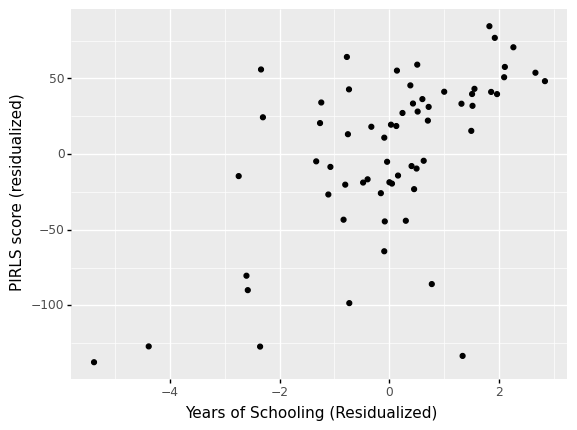

<ggplot: (-9223371889444501932)>

In [27]:
ggplot(data=avgY_pirls) + \
    geom_point(mapping=aes(x='Residuals_Years', y='Residuals'), na_rm=True) + \
    xlab("Years of Schooling (Residualized)") + \
    ylab("PIRLS score (residualized)")

* The models shown above proves that the quantity of schooling years has relatively low impact on the TIMSS and the PIRLS scores. This means that there are still some countries whose GDP and average schooling years don't explain their scores.

## Exercise 3

* DataFrame `learning` contains learning outcome estimates per country, industry and year.

In [28]:
learning = pd.read_stata('HLO Panel Data (mean, thresh) - Jan 2018.dta')
learning

,country,idcntry,cntabb,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,1965,NaN,NaN
1,"Abu Dhabi, UAE",7842,ADA,1970,NaN,NaN
2,"Abu Dhabi, UAE",7842,ADA,1975,NaN,NaN
3,"Abu Dhabi, UAE",7842,ADA,1980,NaN,NaN
4,"Abu Dhabi, UAE",7842,ADA,1985,NaN,NaN
...,...,...,...,...,...,...
1844,Zimbabwe,716,ZWE,1995,NaN,NaN
1845,Zimbabwe,716,ZWE,2000,NaN,NaN
1846,Zimbabwe,716,ZWE,2005,342.98999,48.27
1847,Zimbabwe,716,ZWE,2010,NaN,NaN


* `low_threshold` column contains the percentage of subjects above the 400 mark. Null values are not useful so they are removed.

In [29]:
learning = learning[~learning['low_threshold'].isnull()]
learning

,country,idcntry,cntabb,year,HLO,low_threshold
9,"Abu Dhabi, UAE",7842,ADA,2010,428.679993,73.830002
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
18,Albania,8,ALB,2000,400.649994,57.750000
19,Albania,8,ALB,2005,399.320007,60.150002
20,Albania,8,ALB,2010,402.750000,61.320000
...,...,...,...,...,...,...
1824,Zambia,894,ZMB,2005,324.459991,27.500000
1833,Zanzibar,9834,ZAN,1995,347.700012,17.840000
1834,Zanzibar,9834,ZAN,2000,310.540009,34.330002
1835,Zanzibar,9834,ZAN,2005,321.880005,38.040001


* We are interested in comparing the new with the previous estimates per country, so `country_scores` and `learning` should be joined.

In [30]:
estimates = pd.merge(country_scores[['Country Code','PercMathTIMSS','PercReadPIRLS']],
                     learning[['cntabb','year','low_threshold']],
                     left_on='Country Code',
                     right_on='cntabb',
                     how='inner')
estimates

,Country Code,PercMathTIMSS,PercReadPIRLS,cntabb,year,low_threshold
0,ARE,64.0,63.982311,ARE,2010,71.330002
1,ARE,64.0,63.982311,ARE,2015,80.839996
2,ARG,51.0,66.000000,ARG,1995,67.989998
3,ARG,51.0,66.000000,ARG,2000,60.360001
4,ARG,51.0,66.000000,ARG,2005,64.889999
...,...,...,...,...,...,...
379,ZAF,NaN,24.000000,ZAF,1995,38.480000
380,ZAF,NaN,24.000000,ZAF,2000,29.010000
381,ZAF,NaN,24.000000,ZAF,2005,33.340000
382,ZAF,NaN,24.000000,ZAF,2010,44.000000


* There are several entries for each country, depending on the year of the estimation. We will keep the most recent ones.

In [31]:
estimates = estimates.loc[estimates.groupby('Country Code')['year'].agg(pd.Series.idxmax)]
estimates

,Country Code,PercMathTIMSS,PercReadPIRLS,cntabb,year,low_threshold
1,ARE,64.000000,63.982311,ARE,2015,80.839996
6,ARG,51.000000,66.000000,ARG,2015,70.860001
8,ARM,71.505402,NaN,ARM,2010,86.129997
18,AUS,90.000000,92.932800,AUS,2015,91.529999
23,AUT,95.302193,97.104111,AUT,2015,88.510002
...,...,...,...,...,...,...
363,TUR,77.000000,NaN,TUR,2015,79.449997
366,URY,57.000000,70.000000,URY,2015,72.650002
376,USA,96.000000,97.517357,USA,2015,93.300003
378,YEM,9.265388,NaN,YEM,2010,40.000000


* To compare the estimates on TIMSS and on PIRLS scales, `estimates` DataFrame is divided into two DataFrames, one containing all non-null values regarding TIMSS(`estimates_timss`), and another containing all non-null values regarding PIRLS(`estimates_pirls`).

In [32]:
estimates_timss = estimates[~estimates['PercMathTIMSS'].isnull()]

estimates_pirls = estimates[~estimates['PercReadPIRLS'].isnull()]

* The **Spearman test** results between the new estimates for **TIMSS** and the previous estimates are shown below.
* The correlation is 0.897, that is almost 0.90, which claims that the new and the previous estimates are quite similar.

In [33]:
stats.spearmanr(estimates_timss['low_threshold'], estimates_timss['PercMathTIMSS'])

SpearmanrResult(correlation=0.8973790562032015, pvalue=1.6879737641244243e-25)

* The **Spearman test** results between the new estimates for **PIRLS** and the previous estimates are shown below. 
* The correlation is 0.90, which claims that the new and the previous estimates are quite similar.

In [34]:
stats.spearmanr(estimates_pirls['low_threshold'], estimates_pirls['PercReadPIRLS'])

SpearmanrResult(correlation=0.9045173418249431, pvalue=5.2905847721937165e-25)

* The **plot** below shows the relation between the new and the previous **TIMSS** estimates. As Spearman test predicted, the relationship is almost monotonic.

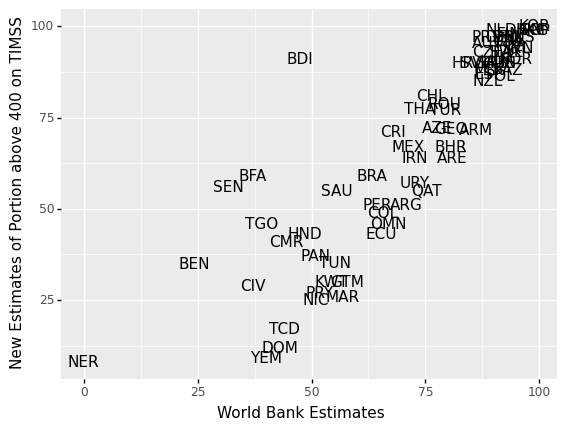

<ggplot: (-9223371889443322048)>

In [35]:
ggplot(data=estimates_timss) + \
    geom_text(mapping=aes(x='low_threshold', y='PercMathTIMSS',label='Country Code'), na_rm=True) + \
    xlab("World Bank Estimates") + \
    ylab("New Estimates of Portion above 400 on TIMSS")

* The **plot** below shows the relation between the new and the previous **PIRLS** estimates. As Spearman test predicted, the relationship is almost monotonic.

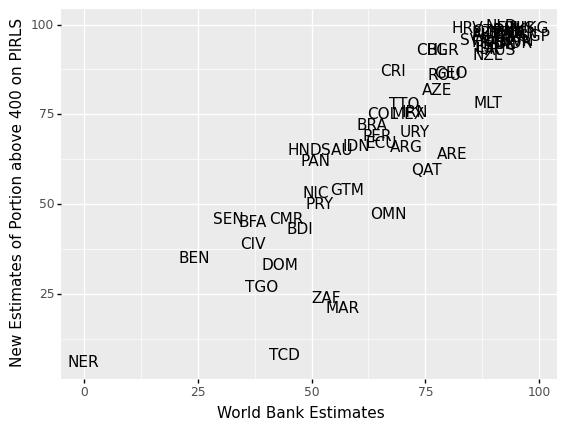

<ggplot: (-9223371889444523236)>

In [36]:
ggplot(data=estimates_pirls) + \
    geom_text(mapping=aes(x='low_threshold', y='PercReadPIRLS',label='Country Code'), na_rm=True) + \
    xlab("World Bank Estimates") + \
    ylab("New Estimates of Portion above 400 on PIRLS")

## Exercise 4

* DataFrame `graduates` contains all the information we need to get the college and the high school graduated employees per industry.
* Each entry represents a portion of people which the entry's information is representative to. Let's name this portion "**IPUMS person**". 
* [PERWT](https://usa.ipums.org/usa-action/variables/PERWT#description_section) column is the (IPUMS) person weight, that is the number of these people. So, `PERWT` is the weight of each IPUMS person we will use to calculate the weighted averages.
* `compression` parameter is used as the file is compressed.

In [37]:
graduates = pd.read_csv('usa_00001.csv.gz',
                        compression='gzip',
                        sep=',',
                        index_col=False)
graduates

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371613,2000,200004,157985,600.0,2000001579854,12,1,2,606.0,6,62,1,10,4740,708
371614,2000,200004,157985,600.0,2000001579854,12,1,3,494.0,1,10,0,0,9920,0
371615,2000,200004,157986,600.0,2000001579864,6,1,1,556.0,6,62,1,10,7020,337
371616,2000,200004,157986,600.0,2000001579864,6,1,2,600.0,6,65,1,10,130,759


* All entries are about 2000.

In [38]:
graduates['YEAR'].value_counts()

2000    371618
Name: YEAR, dtype: int64

* [SERIAL](https://usa.ipums.org/usa-action/variables/SERIAL#description_section) column identifies each IPUMS household, while [SAMPLE](https://usa.ipums.org/usa-action/variables/SAMPLE#description_section) identifies the IPUMS sample (4-first digits are the year and last 2 are the sample number of the year). [PERNUM](https://usa.ipums.org/usa-action/variables/PERNUM#description_section) numbers all IPUMS persons within a IPUMS household. That means that combining these three columns we have the identification of each IPUMS person, that is the identification of the portion of people that the particular enty is representative to.
* Grouping by `SERIAL`, `SAMPLE` and `PERNUM`, we get the number of unique IPUMS persons.
* Comparing the result of the grouping with the number of rows of `graduates` DataFrame, it is proved that each IPUMS person is unique.

In [39]:
len(graduates[['SAMPLE','SERIAL','PERNUM']].value_counts())

371618

* Column [EDUC](https://usa.ipums.org/usa-action/variables/EDUC#description_section) contains the years of education.
* DataFrame `college` contains college graduates, while `highschool` contains high school graduates.

In [40]:
# college graduates
college = graduates[graduates['EDUC']>=10]

# high school graduates
highschool = graduates[(graduates['EDUC']>=6) & (graduates['EDUC']<10)]

display(college)
highschool

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
8,2000,200004,5,600.0,2000000000054,12,1,1,603.0,10,101,3,30,700,959
13,2000,200004,7,600.0,2000000000074,6,1,1,628.0,10,101,1,10,3300,819
14,2000,200004,7,600.0,2000000000074,6,1,2,708.0,11,114,1,10,2600,657
20,2000,200004,11,600.0,2000000000114,17,1,2,518.0,11,116,1,10,2010,837
21,2000,200004,12,200.0,2000000000124,11,1,1,214.0,10,101,3,30,30,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371598,2000,200004,157979,600.0,2000001579794,6,1,1,556.0,10,101,1,10,20,668
371599,2000,200004,157979,600.0,2000001579794,6,1,2,615.0,11,114,3,30,2310,786
371601,2000,200004,157980,600.0,2000001579804,6,1,1,627.0,11,115,1,10,2340,947
371602,2000,200004,157981,600.0,2000001579814,26,1,1,612.0,10,101,3,30,2310,786


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371611,2000,200004,157984,500.0,2000001579844,28,1,2,500.0,6,62,3,30,9920,0
371612,2000,200004,157985,600.0,2000001579854,12,1,1,553.0,7,71,1,10,9130,617
371613,2000,200004,157985,600.0,2000001579854,12,1,2,606.0,6,62,1,10,4740,708
371615,2000,200004,157986,600.0,2000001579864,6,1,1,556.0,6,62,1,10,7020,337


* Since each IPUMS person is unique, if we have for a specific industry $n$ entries with the **same PERWT**, let's say $w1$, since
$$w1*1 + w1*1 + ... +w1*1 = w1*(1+1+...+1) = w1*n$$
instead of doing $n$ additions and $n-1$ multiplications, we can
count the number of duplicated w1 (that is $n$) and then multiply the number with w1.  
This way, we only have $n$ additions and $1$ multiplication.

* Following the instructions mentioned above, we have to find the number of college graduates and high school graduates per industry, having the same weight(PERWT).
* First, we find the number of college graduates with same weight and store it in `college_w` DataFrame.
* `GrandNum` contains the number of graduates (as IPUMS persons) per industry and weight.

In [41]:
# for each industry get number of college graduates of same weight
college_w = college[['IND','PERWT']].value_counts().to_frame().sort_values(by=['IND','PERWT']).reset_index()

# rename column
college_w.rename(columns={0:'GrandNum'}, inplace=True)

college_w

,IND,PERWT,GrandNum
0,0,116.0,1
1,0,126.0,1
2,0,132.0,1
3,0,133.0,1
4,0,134.0,1
...,...,...,...
29950,992,1885.0,1
29951,992,2261.0,1
29952,992,2403.0,1
29953,992,2467.0,1


* Same goes for high school graduates, stored in `highschool_w` DataFrame.

In [42]:
# for each industry get number of high school graduates of same weight
highschool_w = highschool[['IND','PERWT']].value_counts().to_frame().sort_values(by=['IND','PERWT']).reset_index()

# rename column
highschool_w.rename(columns={0:'GrandNum'},inplace=True)

highschool_w

,IND,PERWT,GrandNum
0,0,88.0,1
1,0,97.0,1
2,0,105.0,1
3,0,108.0,1
4,0,111.0,1
...,...,...,...
63942,992,2505.0,1
63943,992,2582.0,1
63944,992,2603.0,1
63945,992,2825.0,1


* To calculate the weighted average we use the following formula
$$weightedAVG_i = \frac{\sum_{w=1}^{n}(PERWT_{iw} * GrandNum_{iw})}
                       {\sum_{w=1}^{n}PERWT_{iw}}$$  
where $i$ is the industry (yr:2000), $n$ is the number of unique weights, and $w$ is each unique weight in relation to the industry.  
* The denominator is needed as the weights (column `PERWT`) per industry don't add up to one.
* This formula will be used twice, once for the college graduates and once for the high school graduates.

* In order to calculate the upper value, first all math products should be found.
* These products state the number of people that are represented by the corresponding IPUMS person.
* Column `Product` contains theses values.

In [43]:
college_w['Product'] = college_w['PERWT'] * college_w['GrandNum']

highschool_w['Product'] = highschool_w['PERWT'] * highschool_w['GrandNum']

display(college_w)
highschool_w

,IND,PERWT,GrandNum,Product
0,0,116.0,1,116.0
1,0,126.0,1,126.0
2,0,132.0,1,132.0
3,0,133.0,1,133.0
4,0,134.0,1,134.0
...,...,...,...,...
29950,992,1885.0,1,1885.0
29951,992,2261.0,1,2261.0
29952,992,2403.0,1,2403.0
29953,992,2467.0,1,2467.0


,IND,PERWT,GrandNum,Product
0,0,88.0,1,88.0
1,0,97.0,1,97.0
2,0,105.0,1,105.0
3,0,108.0,1,108.0
4,0,111.0,1,111.0
...,...,...,...,...
63942,992,2505.0,1,2505.0
63943,992,2582.0,1,2582.0
63944,992,2603.0,1,2603.0
63945,992,2825.0,1,2825.0


* In `psum_college` there is one entry per industry with the sum of the products stored in `Product` column regarding college graduates, while `psum_high` contains one entry per industry with the sum of the products regarding high school graduates.
* These values are the numerator of the upper fraction.

In [44]:
# sum the Products per industry
psum_college = college_w[['IND','Product']].groupby('IND').sum('Product').reset_index()
psum_high = highschool_w[['IND','Product']].groupby('IND').sum('Product').reset_index()

# rename column
psum_college.rename(columns={'Product':'ProductsSum'},inplace=True)
psum_high.rename(columns={'Product':'ProductsSum'},inplace=True)

display(psum_college)
psum_high

,IND,ProductsSum
0,0,5117532.0
1,17,133389.0
2,18,70935.0
3,19,10095.0
4,27,7917.0
...,...,...
260,977,19135.0
261,978,5411.0
262,979,14043.0
263,987,8663.0


,IND,ProductsSum
0,0,23197023.0
1,17,673515.0
2,18,445599.0
3,19,19550.0
4,27,105065.0
...,...,...
261,977,76635.0
262,978,19440.0
263,979,29667.0
264,987,27284.0


* In `wsum_college` there is one entry per industry with the sum of the weights of college graduates, while `wsum_high` contains one entry per industry with the sum of the weights of high school graduates.
* These values are the denominator of the upper fraction.

In [45]:
# sum the weights(PERWT) per industry
wsum_college = college_w[['IND','PERWT']].groupby('IND').sum('PERWT').reset_index()
wsum_high = highschool_w[['IND','PERWT']].groupby('IND').sum('PERWT').reset_index()

# rename column
wsum_college.rename(columns={'PERWT':'WeightSum'},inplace=True)
wsum_high.rename(columns={'PERWT':'WeightSum'},inplace=True)

display(wsum_college)
wsum_high

,IND,WeightSum
0,0,989060.0
1,17,109793.0
2,18,66089.0
3,19,9941.0
4,27,7917.0
...,...,...
260,977,17912.0
261,978,5411.0
262,979,14043.0
263,987,8663.0


,IND,WeightSum
0,0,2564857.0
1,17,365628.0
2,18,305292.0
3,19,19017.0
4,27,97014.0
...,...,...
261,977,68096.0
262,978,17588.0
263,979,28436.0
264,987,25893.0


* The weighted averages of college and high school graduates per industry are stored in `wAVG_college` and `wAVG_high` accordingly.
* To calculate these amounts, we combine the numerators and the denominators to then make the division.

In [46]:
# combine numerators and denominators
wAVG_college = pd.merge(psum_college,
                        wsum_college,
                        on='IND',
                        how='inner')
wAVG_high = pd.merge(psum_high,
                     wsum_high,
                     on='IND',
                     how='inner')

# calculate the weighted averages
wAVG_college['WeightedAVG_college'] = wAVG_college['ProductsSum'] / wsum_college['WeightSum']
wAVG_high['WeightedAVG_highschool'] = wAVG_high['ProductsSum'] / wsum_high['WeightSum']

display(wAVG_college)
wAVG_high

,IND,ProductsSum,WeightSum,WeightedAVG_college
0,0,5117532.0,989060.0,5.174137
1,17,133389.0,109793.0,1.214914
2,18,70935.0,66089.0,1.073325
3,19,10095.0,9941.0,1.015491
4,27,7917.0,7917.0,1.000000
...,...,...,...,...
260,977,19135.0,17912.0,1.068278
261,978,5411.0,5411.0,1.000000
262,979,14043.0,14043.0,1.000000
263,987,8663.0,8663.0,1.000000


,IND,ProductsSum,WeightSum,WeightedAVG_highschool
0,0,23197023.0,2564857.0,9.044178
1,17,673515.0,365628.0,1.842077
2,18,445599.0,305292.0,1.459583
3,19,19550.0,19017.0,1.028028
4,27,105065.0,97014.0,1.082988
...,...,...,...,...
261,977,76635.0,68096.0,1.125396
262,978,19440.0,17588.0,1.105299
263,979,29667.0,28436.0,1.043290
264,987,27284.0,25893.0,1.053721


* DataFrame `skills_intensity_industry` contains the weighted average for college graduates and the weighted average for high school students per industry. In other words, this DataFrame stores for each industry the intensity of its employers' skills in the 2000 census.
* Since there is a possibility that an industry has only college graduates or only high school graduates, the merge of the two DataFrames is outer.

In [47]:
skills_intensity_industry = pd.merge(wAVG_college[['IND','WeightedAVG_college']],
                                     wAVG_high[['IND','WeightedAVG_highschool']],
                                     on='IND',
                                     how='outer')
skills_intensity_industry

,IND,WeightedAVG_college,WeightedAVG_highschool
0,0,5.174137,9.044178
1,17,1.214914,1.842077
2,18,1.073325,1.459583
3,19,1.015491,1.028028
4,27,1.000000,1.082988
...,...,...,...
261,978,1.000000,1.105299
262,979,1.000000,1.043290
263,987,1.000000,1.053721
264,992,1.137851,1.334396


* In the 1990-2000 decade some industries were merged with others or divided into others. So we need to reweight the weighted averages on account of these differences.
* To do that, we use the `ind_1990_2000` DataFrame, which contains the matching of the industry codes between 1990 and 2000, with the weights to account for the differences in this decade.

In [48]:
ind_1990_2000 = pd.read_stata('cw_ind2000_ind1990ddx.dta')

ind_1990_2000

,ind2000,ind1990ddx,weight
0,17,10,0.994016
1,17,31,0.002637
2,17,121,0.001740
3,17,561,0.001607
4,18,11,0.990907
...,...,...,...
707,957,922,0.009144
708,957,931,0.983767
709,959,700,0.038986
710,959,910,0.041877


* To reweight the weighted averages of the industries with the new weights from `ind_1990_2000`, we need to match the weighted averages with the weights they are about to be reweighted with. 
* To make things easier, we separate the industries that were not divided into or merged with others from the ones who were, so `skills_1990` contains information about industries whose IDs changed until 2000, while `skills_2000` contains information about industries whose IDs didn't.

In [49]:
skills_1990 = pd.merge(ind_1990_2000[['ind1990ddx','ind2000','weight']],
                       skills_intensity_industry,
                       right_on='IND',
                       left_on='ind2000',
                       how='inner')
skills_1990

,ind1990ddx,ind2000,weight,IND,WeightedAVG_college,WeightedAVG_highschool
0,10,17,0.994016,17,1.214914,1.842077
1,31,17,0.002637,17,1.214914,1.842077
2,121,17,0.001740,17,1.214914,1.842077
3,561,17,0.001607,17,1.214914,1.842077
4,11,18,0.990907,18,1.073325,1.459583
...,...,...,...,...,...,...
707,922,957,0.009144,957,1.872778,1.723998
708,931,957,0.983767,957,1.872778,1.723998
709,700,959,0.038986,959,1.603595,1.549512
710,910,959,0.041877,959,1.603595,1.549512


* In `skills_2000` we keep all entries of `skills_intensity_industry` that do not need to be reweighted.

In [50]:
skills_2000 = skills_intensity_industry[~skills_intensity_industry['IND'].isin(skills_1990['ind2000'])]
skills_2000

,IND,WeightedAVG_college,WeightedAVG_highschool
0,0,5.174137,9.044178
257,967,1.166196,1.260836
258,968,1.220206,1.177289
259,969,1.136682,1.245269
260,977,1.068278,1.125396
261,978,1.000000,1.105299
262,979,1.000000,1.043290
263,987,1.000000,1.053721
264,992,1.137851,1.334396


* To calculate the reweighted average we use the following formula
$$weightedAVG_i = \frac{\sum_{w=1}^{n}(weight_{iw} * WeightedAVG_{iw})}
                       {\sum_{w=1}^{n}weight_{iw}}$$  
where $i$ is the industry (whose ID changed in 1990-2000), $n$ is the number of unique weights and $w$ is each unique weight in relation to the industry.  
* The denominator is needed as the weights (column `weight`) per industry may not add up to one.
* This formula will be used twice, once for the college graduates and once for the high school graduates.

* In order to calculate the upper value, first all math products should be found.
* Column `Product_college` contains the products regarding college graduates, while `Product_highschool` contains the products regarding high school graduates.

In [51]:
# calculate product regarding college graduates
skills_1990['Product_college'] = skills_1990['weight'] * skills_1990['WeightedAVG_college']

# calculate product regarding high school graduates
skills_1990['Product_highschool'] = skills_1990['weight'] * skills_1990['WeightedAVG_highschool']

skills_1990

,ind1990ddx,ind2000,weight,IND,WeightedAVG_college,WeightedAVG_highschool,Product_college,Product_highschool
0,10,17,0.994016,17,1.214914,1.842077,1.207643,1.831054
1,31,17,0.002637,17,1.214914,1.842077,0.003203,0.004857
2,121,17,0.001740,17,1.214914,1.842077,0.002114,0.003206
3,561,17,0.001607,17,1.214914,1.842077,0.001952,0.002960
4,11,18,0.990907,18,1.073325,1.459583,1.063565,1.446310
...,...,...,...,...,...,...,...,...
707,922,957,0.009144,957,1.872778,1.723998,0.017126,0.015765
708,931,957,0.983767,957,1.872778,1.723998,1.842377,1.696012
709,700,959,0.038986,959,1.603595,1.549512,0.062518,0.060409
710,910,959,0.041877,959,1.603595,1.549512,0.067154,0.064889


* Columns `IND`,`ind2000`, `WeightedAVG_college` and `WeightedAVG_highschool` are no longer needed.

In [52]:
skills_1990 = skills_1990.drop(['IND','ind2000','WeightedAVG_college', 'WeightedAVG_highschool'],axis=1)
skills_1990

,ind1990ddx,weight,Product_college,Product_highschool
0,10,0.994016,1.207643,1.831054
1,31,0.002637,0.003203,0.004857
2,121,0.001740,0.002114,0.003206
3,561,0.001607,0.001952,0.002960
4,11,0.990907,1.063565,1.446310
...,...,...,...,...
707,922,0.009144,0.017126,0.015765
708,931,0.983767,1.842377,1.696012
709,700,0.038986,0.062518,0.060409
710,910,0.041877,0.067154,0.064889


* Having all products of the numerator and weights for the denominator, it's time to calculate their sums.

In [53]:
# calculate sums of products and sums of weights
skills_1990 = skills_1990.groupby('ind1990ddx').sum().reset_index()

# rename columns
skills_1990.rename(columns={'weight':'WeightSum',
                            'Product_college':'PrSum_college',
                            'Product_highschool':'PrSum_highschool',
                            'ind1990ddx':'IND'},inplace=True)
skills_1990

,IND,WeightSum,PrSum_college,PrSum_highschool
0,10,1.343036,1.601909,2.227305
1,11,0.990907,1.063565,1.446310
2,20,2.597809,3.279932,3.626998
3,31,1.201507,1.243346,1.258667
4,32,1.041145,1.049985,1.116837
...,...,...,...,...
217,921,1.000000,1.356334,1.843722
218,922,0.902276,1.754562,1.657839
219,930,0.664873,0.867454,0.833987
220,931,1.082054,1.969146,1.827287


* Using the formula mentioned before, the reweighted weighted averages are calculated and stored in `WeightedAVG_college` and `WeightedAVG_highschool`.
* Columns `WeightSum`,`PrSum_college` and `PrSum_highschool` are no longer needed.

In [54]:
# calculate weighted averages
skills_1990['WeightedAVG_college'] = skills_1990['PrSum_college'] / skills_1990['WeightSum']
skills_1990['WeightedAVG_highschool'] = skills_1990['PrSum_highschool'] / skills_1990['WeightSum']

# drop unneeded columns
skills_1990 = skills_1990.drop(['WeightSum','PrSum_college','PrSum_highschool'], axis=1)

skills_1990

,IND,WeightedAVG_college,WeightedAVG_highschool
0,10,1.192753,1.658411
1,11,1.073325,1.459583
2,20,1.262576,1.396176
3,31,1.034822,1.047574
4,32,1.008490,1.072700
...,...,...,...
217,921,1.356334,1.843722
218,922,1.944594,1.837396
219,930,1.304690,1.254355
220,931,1.819822,1.688721


* Having the weighted averages of all industries in `skills_1990` and `skills_2000`, it's time to combine them into one DataFrame, `skills_intesity_industry`.

In [55]:
skills_intensity_industry = skills_2000.append(skills_1990).sort_values(by='IND')
skills_intensity_industry

,IND,WeightedAVG_college,WeightedAVG_highschool
0,0,5.174137,9.044178
0,10,1.192753,1.658411
1,11,1.073325,1.459583
2,20,1.262576,1.396176
3,31,1.034822,1.047574
...,...,...,...
260,977,1.068278,1.125396
261,978,1.000000,1.105299
262,979,1.000000,1.043290
263,987,1.000000,1.053721


* DataFrame `exports_notfixed` contains exports between countries in different years and industry sectors.

In [56]:
exports_notfixed = pd.read_csv('BACI_HS17_Y2018_V202001.csv.gz',
                               compression='gzip',
                               sep=',',
                               index_col=False)
exports_notfixed

,t,i,j,k,v,q
0,2018,4,24,845420,101.397000,26.000000
1,2018,4,24,848180,2.328000,0.007000
2,2018,4,31,570110,1.596000,0.037000
3,2018,4,32,340319,8.699331,0.113000
4,2018,4,32,610910,1.098000,0.013000
...,...,...,...,...,...,...
7738898,2018,894,842,960190,76.858000,5.075000
7738899,2018,894,842,970190,4.519000,0.214000
7738900,2018,894,842,970500,93.706896,2.786751
7738901,2018,894,854,100510,2.141000,0.412000


* To make things easier, columns are renamed based on their meaning.

In [57]:
exports_notfixed.rename(columns={'t':'Year',
                                 'i':'Exporter',
                                 'j':'Importer',
                                 'k':'ProductCateg_HS6',
                                 'v':'Value(thousands)',
                                 'q':'Quantity(tons)'}, inplace=True)
exports_notfixed

,Year,Exporter,Importer,ProductCateg_HS6,Value(thousands),Quantity(tons)
0,2018,4,24,845420,101.397000,26.000000
1,2018,4,24,848180,2.328000,0.007000
2,2018,4,31,570110,1.596000,0.037000
3,2018,4,32,340319,8.699331,0.113000
4,2018,4,32,610910,1.098000,0.013000
...,...,...,...,...,...,...
7738898,2018,894,842,960190,76.858000,5.075000
7738899,2018,894,842,970190,4.519000,0.214000
7738900,2018,894,842,970500,93.706896,2.786751
7738901,2018,894,854,100510,2.141000,0.412000


* To map the product categories(`ProductCateg_HS6`) to the industry codes(`IND`), first they must be mapped to the Standard Industrial Codes(`SIC87`). 
* `hs6_sic87_match` DataFrame contains the mapping of HS 6-digit codes to SIC87 industry codes, along with the share values.

In [58]:
hs6_sic87_match = pd.read_stata('cw_hs6_sic87dd.dta')
hs6_sic87_match

,hs6,sic87dd,share,weights_method
0,10110.0,272.0,1.000000,no weights needed
1,10111.0,272.0,1.000000,no weights needed
2,10119.0,272.0,1.000000,no weights needed
3,10120.0,272.0,1.000000,no weights needed
4,10190.0,272.0,1.000000,no weights needed
...,...,...,...,...
6747,640419.0,NaN,0.084449,trade-based allocated 314X imports
6748,640420.0,NaN,0.012955,trade-based allocated 314X imports
6749,640510.0,NaN,0.121528,trade-based allocated 314X imports
6750,640520.0,NaN,0.192258,trade-based allocated 314X imports


* The mapping of `ProductCateg_HS6` and `SIC87` codes is shown below.

In [59]:
exports_notfixed = pd.merge(hs6_sic87_match,
                            exports_notfixed,
                            left_on='hs6',
                            right_on='ProductCateg_HS6',
                            how='inner')
exports_notfixed

,hs6,sic87dd,share,weights_method,Year,Exporter,Importer,ProductCateg_HS6,Value(thousands),Quantity(tons)
0,10190.0,272.0,1.00000,no weights needed,2018,32,58,10190,306.137000,133.868000
1,10190.0,272.0,1.00000,no weights needed,2018,36,58,10190,245.604000,107.398000
2,10190.0,272.0,1.00000,no weights needed,2018,36,242,10190,1.230000,0.850435
3,10190.0,272.0,1.00000,no weights needed,2018,36,288,10190,3.543000,0.684000
4,10190.0,272.0,1.00000,no weights needed,2018,40,208,10190,4.435000,3.401739
...,...,...,...,...,...,...,...,...,...,...
9631891,640320.0,NaN,0.33602,trade-based allocated 314X imports,2018,842,826,640320,344.405060,6.720000
9631892,640320.0,NaN,0.33602,trade-based allocated 314X imports,2018,842,862,640320,14.803000,0.196000
9631893,640320.0,NaN,0.33602,trade-based allocated 314X imports,2018,858,76,640320,3.564000,0.076000
9631894,640320.0,NaN,0.33602,trade-based allocated 314X imports,2018,860,156,640320,1.002000,0.009000


* The value of trade flow (`Value(thousands)`) is adjusted with the `share` column.

In [60]:
exports_notfixed.loc[:,'Value(thousands)'] = exports_notfixed['Value(thousands)'] * exports_notfixed['share']

exports_notfixed

,hs6,sic87dd,share,weights_method,Year,Exporter,Importer,ProductCateg_HS6,Value(thousands),Quantity(tons)
0,10190.0,272.0,1.00000,no weights needed,2018,32,58,10190,306.137000,133.868000
1,10190.0,272.0,1.00000,no weights needed,2018,36,58,10190,245.604000,107.398000
2,10190.0,272.0,1.00000,no weights needed,2018,36,242,10190,1.230000,0.850435
3,10190.0,272.0,1.00000,no weights needed,2018,36,288,10190,3.543000,0.684000
4,10190.0,272.0,1.00000,no weights needed,2018,40,208,10190,4.435000,3.401739
...,...,...,...,...,...,...,...,...,...,...
9631891,640320.0,NaN,0.33602,trade-based allocated 314X imports,2018,842,826,640320,115.726955,6.720000
9631892,640320.0,NaN,0.33602,trade-based allocated 314X imports,2018,842,862,640320,4.974103,0.196000
9631893,640320.0,NaN,0.33602,trade-based allocated 314X imports,2018,858,76,640320,1.197575,0.076000
9631894,640320.0,NaN,0.33602,trade-based allocated 314X imports,2018,860,156,640320,0.336692,0.009000


* `exports_notfixed` DataFrame now contains the trade flow by exporter and SIC87 industry code. In other words, for each country the value of its exports per industry in 2018. 
* The problem is that the ids of the industries and the country codes are not in the form we use along the assignment. This problem will be fixed later on.

In [61]:
# keep exports made on 2018 only
exports_notfixed = exports_notfixed[exports_notfixed['Year']==2018]

# get trade flow per exporter and industry
exports_notfixed = exports_notfixed[['Exporter','sic87dd','Value(thousands)']].groupby(['Exporter','sic87dd']).sum().reset_index()

exports_notfixed

,Exporter,sic87dd,Value(thousands)
0,4,119.0,68290.428330
1,4,131.0,39698.892614
2,4,132.0,43.993665
3,4,134.0,380.462682
4,4,139.0,13308.065785
...,...,...,...
67623,894,3996.0,1.893083
67624,894,3999.0,4143.753862
67625,894,9100.0,45340.133460
67626,894,9200.0,2643.833137


* To map the `SIC87` codes to the industry codes(`IND`), `sic87_ind1990_match` DataFrame is needed, as it contains this exact information.

In [62]:
sic87_ind1990_match = pd.read_stata('cw_sic87_ind1990ddx.dta')
sic87_ind1990_match

,ind1990ddx,sic87
0,10,111
1,10,112
2,10,115
3,10,116
4,10,119
...,...,...
999,931,9641
1000,931,9651
1001,931,9661
1002,932,9711


* Before mapping sic87 codes to 1990 census industry codes, column `sic87dd` is renamed to avoid having two columns with the same data in the final DataFrame.
* In addition, column `ind1990ddx` is also renamed to match the general name of the 1990 census industry codes we have given (see DataFrame `skills_intensity_industry`).

In [63]:
# rename columns
exports_notfixed.rename(columns={'sic87dd':'sic87'},inplace=True)
sic87_ind1990_match.rename(columns={'ind1990ddx':'IND'},inplace=True)

exports_notfixed = pd.merge(sic87_ind1990_match,
                            exports_notfixed,
                            on='sic87',
                            how='inner')
exports_notfixed

,IND,sic87,Exporter,Value(thousands)
0,10,112,31,8.024000
1,10,112,32,1348.391771
2,10,112,36,466.484000
3,10,112,40,149.945440
4,10,112,48,87.404000
...,...,...,...,...
67047,390,3999,860,1556.644573
67048,390,3999,862,293.485894
67049,390,3999,882,268.716940
67050,390,3999,887,3.891072


* The exporter countries are given with the ISO 3-digit country codes, which isn't the form we use to identify the countries in the rest of this assignment. 
* To map the ISO 3-digit country codes to the three-letter country codes we use we will use `iso3_match` DataFrame.
* `encoding` parameter is used as with the default encoding ('utf-8') an UnicodeDecodeError occurs as utf-8 codec can't decode a specific byte in the file.

In [64]:
iso3_3letter_match = pd.read_csv('country_codes_V202001.csv.gz',
                                 compression='gzip',
                                 sep=',',
                                 index_col=False,
                                 encoding = 'ISO-8859-1')
iso3_3letter_match

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND
...,...,...,...,...,...
222,876,Wallis and Futuna Isds,Wallis and Futuna Islands,WF,WLF
223,882,Samoa,Samoa,WS,WSM
224,887,Yemen,Yemen,YE,YEM
225,891,Serbia and Montenegro,Serbia and Montenegro,CS,SCG


* The mapping of ISO 3-digit country codes to 3-letter country codes is shown below.

In [65]:
exports = pd.merge(iso3_3letter_match[['country_code','iso_3digit_alpha']],
                   exports_notfixed,
                   left_on='country_code',
                   right_on='Exporter',
                   how='inner')
exports

,country_code,iso_3digit_alpha,IND,sic87,Exporter,Value(thousands)
0,4,AFG,10,119,4,68290.428330
1,4,AFG,10,131,4,39698.892614
2,4,AFG,10,132,4,43.993665
3,4,AFG,10,134,4,380.462682
4,4,AFG,10,139,4,13308.065785
...,...,...,...,...,...,...
67047,894,ZMB,390,3965,894,1.555000
67048,894,ZMB,390,3991,894,129.207919
67049,894,ZMB,390,3993,894,4.678000
67050,894,ZMB,390,3996,894,1.893083


* `exports` DataFrame contains the trade flow by exporter (_3-letter country code_) and industry code (_1990 census industry code_). In other words, for each country the value of its exports per industry in 2018. 

In [66]:
# rename column
exports.rename(columns={'iso_3digit_alpha':'CountryCode',
                        'Value(thousands)':'Value'},inplace=True)

exports = exports[['CountryCode','IND','Value']].groupby(['CountryCode','IND']).sum().reset_index()

exports

,CountryCode,IND,Value
0,ABW,10,9.171355
1,ABW,31,17.449418
2,ABW,42,45191.723359
3,ABW,50,6.568428
4,ABW,100,92.648000
...,...,...,...
15248,ZWE,371,837.365475
15249,ZWE,372,293.462913
15250,ZWE,380,2.039000
15251,ZWE,381,27.056000


* Having the following DataFrames :
    - `exports` - the value of exports per country and industry, 
    - `skills_intensity_industry` - the weighted average of college and high school graduates per industry, and
    - `country_scores` - the median math (TIMSS) and reading (PIRLS) scores per country  
* It's time to combine all this information, to study the relationship between the value of exports in the country and the skills possessed by the workforce in the same country.

* First, `exports` and `skills_intensity_industry` are combined.

In [67]:
final = pd.merge(exports,
                 skills_intensity_industry,
                 on='IND',
                 how='inner')
final

,CountryCode,IND,Value,WeightedAVG_college,WeightedAVG_highschool
0,ABW,10,9.171355,1.192753,1.658411
1,AFG,10,382223.183128,1.192753,1.658411
2,AGO,10,2164.778476,1.192753,1.658411
3,AIA,10,95.493752,1.192753,1.658411
4,ALB,10,109019.918964,1.192753,1.658411
...,...,...,...,...,...
15248,TUR,362,157.197069,1.279838,1.344964
15249,UKR,362,143.978577,1.279838,1.344964
15250,USA,362,144033.348975,1.279838,1.344964
15251,VNM,362,49.836198,1.279838,1.344964


* Then, `country scores` data are combined with the result of the previous merge.

In [68]:
final = pd.merge(final,
                 country_scores[['Country Code', 'MedMathScoreTIMSS', 'MedReadScorePIRLS']],
                 right_on='Country Code',
                 left_on='CountryCode',
                 how='inner')
final

,CountryCode,IND,Value,WeightedAVG_college,WeightedAVG_highschool,Country Code,MedMathScoreTIMSS,MedReadScorePIRLS
0,ARE,10,1.220743e+06,1.192753,1.658411,ARE,437.0,440.0
1,ARE,31,5.542072e+04,1.034822,1.047574,ARE,437.0,440.0
2,ARE,42,6.698309e+07,1.067919,1.142634,ARE,437.0,440.0
3,ARE,50,1.469775e+06,1.000000,1.116183,ARE,437.0,440.0
4,ARE,100,5.587374e+05,1.009294,1.266290,ARE,437.0,440.0
...,...,...,...,...,...,...,...,...
6069,ZAF,171,1.936143e+02,1.666362,1.582391,ZAF,NaN,323.0
6070,ZAF,201,2.363589e+05,1.000000,1.061575,ZAF,NaN,323.0
6071,ZAF,230,2.307992e+05,1.000000,1.082882,ZAF,NaN,323.0
6072,ZAF,360,2.027046e+05,1.062180,1.276647,ZAF,NaN,323.0


* `Country Code` is no longer needed, since `CountryCode` contains the same data. 
* In addition, to run the regressions the `Value` column should be logged, and `MedMathScoreTIMSS` and `MedReadScorePIRLS` are divided by 1000 to get a more readable result.

In [69]:
# delete duplicate column
final = final.drop('Country Code', axis=1)

# log Value(thousands)
final['Value'] = np.log(final['Value'])

# divide with 1000 for more readable result
final['MedMathScoreTIMSS'] = final['MedMathScoreTIMSS'] / 1000
final['MedReadScorePIRLS'] = final['MedReadScorePIRLS'] / 1000

final

,CountryCode,IND,Value,WeightedAVG_college,WeightedAVG_highschool,MedMathScoreTIMSS,MedReadScorePIRLS
0,ARE,10,14.014970,1.192753,1.658411,0.437,0.440
1,ARE,31,10.922709,1.034822,1.047574,0.437,0.440
2,ARE,42,18.019951,1.067919,1.142634,0.437,0.440
3,ARE,50,14.200620,1.000000,1.116183,0.437,0.440
4,ARE,100,13.233435,1.009294,1.266290,0.437,0.440
...,...,...,...,...,...,...,...
6069,ZAF,171,5.265868,1.666362,1.582391,NaN,0.323
6070,ZAF,201,12.373107,1.000000,1.061575,NaN,0.323
6071,ZAF,230,12.349303,1.000000,1.082882,NaN,0.323
6072,ZAF,360,12.219505,1.062180,1.276647,NaN,0.323


* The regression below shows the relationship between the **TIMSS scores of college graduates per country and industry and the value of the country's exports**.
* As summary table shows,   
$$R^{2} = 0.564$$ and  
$$Intercept = 11.1775$$

In [70]:
timss_college = smf.ols('Value ~ MedMathScoreTIMSS : WeightedAVG_college + IND + CountryCode',data=final).fit()

timss_college.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     99.09
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:16:20   Log-Likelihood:                -12994.
No. Observations:                5512   AIC:                         2.613e+04
Df Residuals:                    5440   BIC:                         2.661e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                11.1775      0.361     30.997      0.000      10.471      11.884
CountryCode[T.ARG]                       -2.0709      0.402     -5.149      0.000      -2.859      -1.282
CountryCode[T.ARM]                       -5.5754      0.407    -13.696      0.000      -6.373      -4.777
CountryCode[T.AUS]                       -1.0451      0.404     -2.585      0.010      -1.838      -0.253
CountryCode[T.AUT]                       -0.1945      0.404     -0.482      0.630      -0.986       0.597
CountryCode[T.AZE]                       -5.6454      0.406    -13.907      0.000      -6.441      -4.850
CountryCode[T.BDI]                       -9.9802      0.462    -21.581      0.000     -10.887      -9.074
CountryCode[T.BEN]                       -8.1996      0.440    -18.642      0.000      -9.062      -7.337
CountryCode[T.BFA]                       -8.1245      0.427    -19.011      0.000      -8.962      -7.287
CountryCode[T.BGR]                    -2.555e-16   2.61e-16     -0.978      0.328   -7.68e-16    2.57e-16
CountryCode[T.BHR]                       -3.5098      0.403     -8.707      0.000      -4.300      -2.720
CountryCode[T.BRA]                       -0.1340      0.402     -0.333      0.739      -0.922       0.654
CountryCode[T.CAN]                    -2.967e-15   2.92e-16    -10.163      0.000   -3.54e-15   -2.39e-15
CountryCode[T.CHL]                       -2.1123      0.402     -5.253      0.000      -2.901      -1.324
CountryCode[T.CIV]                       -4.2763      0.405    -10.555      0.000      -5.071      -3.482
CountryCode[T.CMR]                       -6.6160      0.412    -16.044      0.000      -7.424      -5.808
CountryCode[T.COG]                       -7.3183      0.422    -17.333      0.000      -8.146      -6.491
CountryCode[T.COL]                       -2.0117      0.403     -4.996      0.000      -2.801      -1.222
CountryCode[T.CRI]                       -3.5673      0.404     -8.822      0.000      -4.360      -2.775
CountryCode[T.CZE]                       -0.2200      0.404     -0.545      0.586      -1.012       0.572
CountryCode[T.DEU]                        1.9402      0.405      4.792      0.000       1.146       2.734
CountryCode[T.DNK]                       -0.9287      0.406     -2.289      0.022      -1.724      -0.133
CountryCode[T.DOM]                       -3.9229      0.411     -9.554      0.000      -4.728      -3.118
CountryCode[T.ECU]                       -3.8247      0.406     -9.411      0.000      -4.621      -3.028
CountryCode[T.ESP]                        0.8114      0.403      2.015      0.044       0.022       1.601
CountryCode[T.FIN]                       -1.6462      0.406     -4.052      0.000      -2.443      -0.850
CountryCo

* The regression below shows the relationship between the **PIRLS scores of college graduates per country and industry and the value of the country's exports**.
* As summary table shows,   
$$R^{2} = 0.568$$ and  
$$Intercept = 11.2639$$

In [71]:
pirls_college = smf.ols('Value ~ MedReadScorePIRLS:WeightedAVG_college + IND + CountryCode',data=final).fit()

pirls_college.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:16:20   Log-Likelihood:                -12409.
No. Observations:                5282   AIC:                         2.496e+04
Df Residuals:                    5213   BIC:                         2.541e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                11.2639      0.356     31.629      0.000      10.566      11.962
CountryCode[T.ARG]                       -2.1933      0.399     -5.503      0.000      -2.975      -1.412
CountryCode[T.ARM]                    -1.079e-14   8.16e-16    -13.222      0.000   -1.24e-14   -9.19e-15
CountryCode[T.AUS]                       -1.0916      0.402     -2.719      0.007      -1.879      -0.304
CountryCode[T.AUT]                       -0.2856      0.401     -0.711      0.477      -1.073       0.501
CountryCode[T.AZE]                       -5.6355      0.403    -13.999      0.000      -6.425      -4.846
CountryCode[T.BDI]                       -9.4898      0.458    -20.704      0.000     -10.388      -8.591
CountryCode[T.BEN]                       -8.2081      0.436    -18.817      0.000      -9.063      -7.353
CountryCode[T.BFA]                       -7.9618      0.424    -18.761      0.000      -8.794      -7.130
CountryCode[T.BGR]                       -1.9601      0.402     -4.876      0.000      -2.748      -1.172
CountryCode[T.BHR]                    -2.498e-16    2.9e-16     -0.862      0.389   -8.18e-16    3.18e-16
CountryCode[T.BRA]                       -0.3005      0.399     -0.754      0.451      -1.082       0.481
CountryCode[T.CAN]                        0.2382      0.403      0.592      0.554      -0.551       1.028
CountryCode[T.CHL]                       -2.3457      0.400     -5.861      0.000      -3.130      -1.561
CountryCode[T.CIV]                       -4.4290      0.401    -11.055      0.000      -5.214      -3.644
CountryCode[T.CMR]                       -6.6910      0.409    -16.379      0.000      -7.492      -5.890
CountryCode[T.COG]                       -7.4047      0.418    -17.711      0.000      -8.224      -6.585
CountryCode[T.COL]                       -2.3220      0.399     -5.826      0.000      -3.103      -1.541
CountryCode[T.CRI]                       -3.8211      0.402     -9.517      0.000      -4.608      -3.034
CountryCode[T.CZE]                       -0.3862      0.403     -0.959      0.337      -1.176       0.403
CountryCode[T.DEU]                        1.8953      0.402      4.712      0.000       1.107       2.684
CountryCode[T.DNK]                       -0.9935      0.403     -2.463      0.014      -1.784      -0.203
CountryCode[T.DOM]                       -4.2393      0.403    -10.516      0.000      -5.030      -3.449
CountryCode[T.ECU]                       -4.0403      0.402    -10.042      0.000      -4.829      -3.252
CountryCode[T.ESP]                        0.6624      0.401      1.653      0.098      -0.123       1.448
CountryCode[T.FIN]                       -1.7313      0.404     -4.282      0.000      -2.524      -0.939
CountryCo

* The regression below shows the relationship between the **TIMSS scores of high school graduates per country and industry and the value of the country's exports**.
* As summary table shows,   
$$R^{2} = 0.582$$ and  
$$Intercept = 9.4441$$

In [72]:
timss_highschool = smf.ols('Value ~ MedMathScoreTIMSS:WeightedAVG_highschool + IND + CountryCode',data=final).fit()

timss_highschool.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     106.8
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:16:21   Log-Likelihood:                -12876.
No. Observations:                5512   AIC:                         2.590e+04
Df Residuals:                    5440   BIC:                         2.637e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    9.4441      0.355     26.595      0.000       8.748      10.140
CountryCode[T.ARG]                          -1.9395      0.394     -4.927      0.000      -2.711      -1.168
CountryCode[T.ARM]                          -5.6543      0.398    -14.192      0.000      -6.435      -4.873
CountryCode[T.AUS]                          -1.4045      0.396     -3.549      0.000      -2.180      -0.629
CountryCode[T.AUT]                          -0.5150      0.395     -1.303      0.193      -1.290       0.260
CountryCode[T.AZE]                          -5.7735      0.397    -14.532      0.000      -6.552      -4.995
CountryCode[T.BDI]                         -10.2515      0.453    -22.640      0.000     -11.139      -9.364
CountryCode[T.BEN]                          -8.0781      0.430    -18.772      0.000      -8.922      -7.234
CountryCode[T.BFA]                          -8.1099      0.418    -19.391      0.000      -8.930      -7.290
CountryCode[T.BGR]                        5.432e-16    2.2e-16      2.474      0.013    1.13e-16    9.74e-16
CountryCode[T.BHR]                          -3.5190      0.395     -8.920      0.000      -4.292      -2.746
CountryCode[T.BRA]                          -0.0198      0.394     -0.050      0.960      -0.791       0.752
CountryCode[T.CAN]                        2.876e-16   2.44e-16      1.178      0.239   -1.91e-16    7.66e-16
CountryCode[T.CHL]                          -2.2249      0.394     -5.654      0.000      -2.996      -1.453
CountryCode[T.CIV]                          -3.9502      0.397     -9.962      0.000      -4.728      -3.173
CountryCode[T.CMR]                          -6.3765      0.404    -15.802      0.000      -7.168      -5.585
CountryCode[T.COG]                          -7.0312      0.413    -17.021      0.000      -7.841      -6.221
CountryCode[T.COL]                          -1.8080      0.394     -4.588      0.000      -2.580      -1.035
CountryCode[T.CRI]                          -3.5308      0.396     -8.921      0.000      -4.307      -2.755
CountryCode[T.CZE]                          -0.5534      0.395     -1.400      0.162      -1.328       0.222
CountryCode[T.DEU]                           1.5376      0.396      3.880      0.000       0.761       2.315
CountryCode[T.DNK]                          -1.3790      0.397     -3.473      0.001      -2.157      -0.601
CountryCode[T.DOM]                          -3.3466      0.402     -8.327      0.000      -4.135      -2.559
CountryCode[T.ECU]                          -3.6301      0.398     -9.127      0.000      -4.410      -2.850
CountryCode[T.ESP]                           0.5992      0.394      1.520      0.128      -0.173       1.372
CountryCode[T.FIN]             

* The regression below shows the relationship between the **PIRLS scores of high school graduates per country and industry and the value of the country's exports**.
* As summary table shows,   
$$R^{2} = 0.586$$ and  
$$Intercept = 9.6458$$

In [73]:
pirls_highschool = smf.ols('Value ~ MedReadScorePIRLS:WeightedAVG_highschool + IND + CountryCode',data=final).fit()

pirls_highschool.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:16:21   Log-Likelihood:                -12297.
No. Observations:                5282   AIC:                         2.473e+04
Df Residuals:                    5213   BIC:                         2.519e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    9.6458      0.351     27.487      0.000       8.958      10.334
CountryCode[T.ARG]                          -2.1589      0.390     -5.532      0.000      -2.924      -1.394
CountryCode[T.ARM]                       -1.164e-14   7.46e-16    -15.601      0.000   -1.31e-14   -1.02e-14
CountryCode[T.AUS]                          -1.4701      0.393     -3.739      0.000      -2.241      -0.699
CountryCode[T.AUT]                          -0.6601      0.393     -1.679      0.093      -1.431       0.111
CountryCode[T.AZE]                          -5.7507      0.394    -14.589      0.000      -6.523      -4.978
CountryCode[T.BDI]                          -9.3744      0.449    -20.892      0.000     -10.254      -8.495
CountryCode[T.BEN]                          -8.0982      0.427    -18.967      0.000      -8.935      -7.261
CountryCode[T.BFA]                          -7.8236      0.415    -18.832      0.000      -8.638      -7.009
CountryCode[T.BGR]                          -2.3668      0.394     -6.012      0.000      -3.139      -1.595
CountryCode[T.BHR]                       -3.131e-15    2.2e-16    -14.263      0.000   -3.56e-15    -2.7e-15
CountryCode[T.BRA]                          -0.3154      0.390     -0.808      0.419      -1.080       0.450
CountryCode[T.CAN]                          -0.2087      0.394     -0.529      0.597      -0.982       0.564
CountryCode[T.CHL]                          -2.6273      0.392     -6.704      0.000      -3.396      -1.859
CountryCode[T.CIV]                          -4.2310      0.392    -10.786      0.000      -5.000      -3.462
CountryCode[T.CMR]                          -6.5186      0.400    -16.299      0.000      -7.303      -5.735
CountryCode[T.COG]                          -7.1962      0.409    -17.584      0.000      -7.998      -6.394
CountryCode[T.COL]                          -2.3582      0.390     -6.043      0.000      -3.123      -1.593
CountryCode[T.CRI]                          -3.9754      0.393    -10.112      0.000      -4.746      -3.205
CountryCode[T.CZE]                          -0.8291      0.394     -2.103      0.036      -1.602      -0.056
CountryCode[T.DEU]                           1.4766      0.394      3.749      0.000       0.704       2.249
CountryCode[T.DNK]                          -1.4727      0.395     -3.728      0.000      -2.247      -0.698
CountryCode[T.DOM]                          -3.9242      0.395     -9.942      0.000      -4.698      -3.150
CountryCode[T.ECU]                          -4.0155      0.394    -10.193      0.000      -4.788      -3.243
CountryCode[T.ESP]                           0.3483      0.392      0.888      0.375      -0.421       1.117
CountryCode[T.FIN]             

* All results of the four regressions come up to one conclusion: the higher the TIMSS and the PIRLS scores of a country are, the bigger amounts this country exports in skill intensive industries.